In [777]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

import seaborn as sn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [778]:
data = pd.read_csv("data/integrated.csv")



label = "playoff"
df = data
df['confID'].value_counts()

bins = 11  # Number of bins
# Use the cut function to perform binning
df['height'] = pd.cut(df['height'], bins=bins)
df['weight'] = pd.cut(df['weight'], bins=bins)

df.columns

Index(['year', 'tmID', 'W_team_post', 'L_team_post', 'franchID', 'confID',
       'rank', 'playoff', 'firstRound', 'semis', 'finals', 'name', 'o_fgm',
       'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb',
       'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm',
       'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb',
       'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts',
       'won_team', 'lost_team', 'GP', 'homeW', 'homeL', 'awayW', 'awayL',
       'confW', 'confL', 'min', 'attend', 'arena', 'coachID', 'stint',
       'won_coach', 'lost_coach', 'post_wins', 'post_losses', 'round',
       'series', 'tmIDWinner', 'tmIDLoser', 'W_series', 'L_series', 'playerID',
       'CBE_Sum', 'pos', 'height', 'weight', 'college', 'birthDate',
       'award_player', 'award_coach'],
      dtype='object')

In [779]:
features = df.columns
toDrop = ["rank", "semis", "finals", "firstRound"]
for col in toDrop:
    features = features.drop(col)

arr = []

for col in df.columns:

    if "post" in col.lower():
        features = features.drop(col)
        arr.append(col)

assert len(features) < len(df.columns)

X = df[features]
df = X

In [780]:
le = LabelEncoder()
y = le.fit_transform(df['playoff'])
for x in df.columns:
    df[x] = le.fit_transform(df[x])

/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_8650/817340014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = le.fit_transform(df[x])
/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_8650/817340014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = le.fit_transform(df[x])
/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_8650/817340014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [781]:
available_columns = list(df.columns.values)

key_predictors = []
features_values = pd.DataFrame(df, columns=available_columns)
target_values = df["playoff"].values
chi2_results = chi2(features_values, target_values)
best_chi2_cols = SelectKBest(chi2, k=30)

best_chi2_cols.fit(features_values, target_values)

best_chi2_features = features_values.columns[best_chi2_cols.get_support()]

for k in (best_chi2_features):
    key_predictors.append(k)

key_predictors.append("playoff")
key_predictors.append("year")
key_predictors.append("confID")
df = df[key_predictors]
corr_matrix = df.corr()
#fig = plt.figure(figsize=(36,36), dpi = 480)
#sn.heatmap(df.corr(), annot = True, fmt = '.2f')
#plt.show()
print(len(df.columns))

33


In [782]:
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.91:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_correlation_pairs.append((feature1, feature2, correlation_value))

# Print the high-correlation pairs
for feature1, feature2, correlation_value in high_correlation_pairs:
    print(f"Features: {feature1} and {feature2} have a correlation of {correlation_value:.2f}")
    if feature2 in key_predictors:
        key_predictors.remove(feature2)

df = df[key_predictors]



Features: o_fta and o_ftm have a correlation of 0.94
Features: o_reb and o_dreb have a correlation of 0.93
Features: o_pts and o_fgm have a correlation of 0.96
Features: lost_team and won_team have a correlation of -0.99
Features: awayL and awayW have a correlation of -0.99
Features: confL and confW have a correlation of -0.94
Features: playoff and playoff have a correlation of 1.00


In [783]:
print(df.columns)

Index(['o_fga', 'o_fta', 'o_oreb', 'o_reb', 'o_asts', 'o_blk', 'o_pts',
       'd_fga', 'd_3pa', 'd_oreb', 'd_reb', 'd_asts', 'd_pf', 'lost_team',
       'homeL', 'awayL', 'confL', 'attend', 'won_coach', 'tmIDWinner',
       'tmIDLoser', 'CBE_Sum', 'birthDate', 'playoff', 'playoff', 'year',
       'confID'],
      dtype='object')


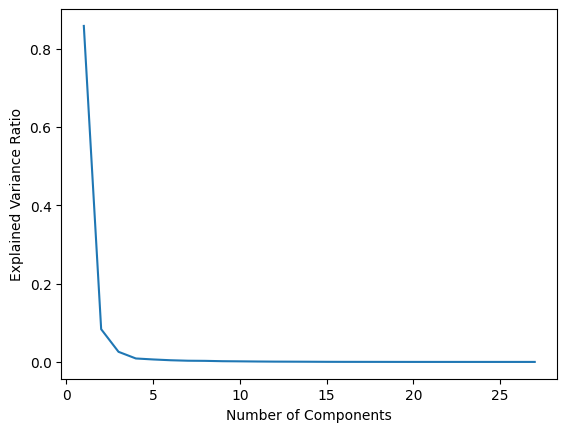

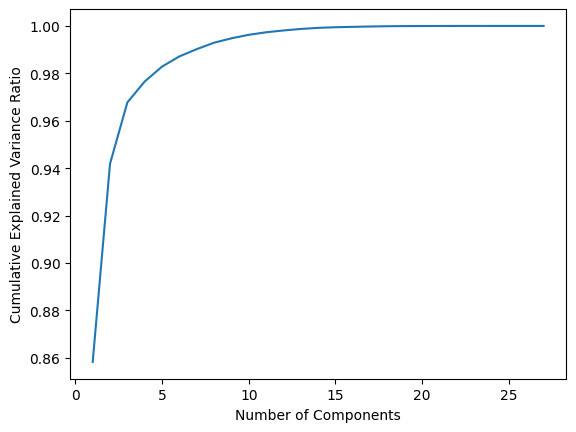

In [784]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df)  # X is your data
explained_var_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

cum_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [785]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 10
columns_to_keep = ['year', 'confID', label]
df_to_keep = df[columns_to_keep]

df.drop(columns_to_keep, axis=1, inplace=True)

custom_column_names = [f'PC{i+1}' for i in range(n_components)]  # Create custom column names

# Assuming 'X' is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=n_components)  # Choose the number of components you want
X_pca = pca.fit_transform(X_scaled)

df_result = pd.DataFrame(data= X_pca, columns=custom_column_names)
df = pd.concat([df_result, df_to_keep], axis=1)

print(df)

# X_pca now contains the reduced-dimensional representation of your data


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.566013  5.793862 -0.019626  1.993834  0.232278  1.601688 -1.166633   
1    -2.365878 -0.409796 -0.505824  2.258797 -0.334285 -1.207993 -1.210018   
2    -2.365878 -0.409796 -0.505824  2.258797 -0.334285 -1.207993 -1.210018   
3     0.342270  0.893106 -0.241592  2.282520  0.498136 -0.508218 -0.301687   
4    -3.636783 -0.708630 -0.398797  1.905794  0.155391 -0.137673  0.749560   
...        ...       ...       ...       ...       ...       ...       ...   
2014 -1.984970  3.335511 -0.304126 -1.982682 -0.833826 -0.245077 -1.486827   
2015  0.131044  3.538514  2.490861 -0.277699  1.408464 -0.037110 -0.496250   
2016 -1.823810  3.757019 -0.310370 -1.727471 -0.759729 -0.425103 -1.430115   
2017 -1.979512  3.326312 -0.305930 -1.955904 -0.836371 -0.240737 -1.489300   
2018  0.235181  3.589314  2.277370 -1.600524  1.495810 -0.809461 -0.426506   

           PC8       PC9      PC10  year  confID  playoff  play

In [786]:
# corr_matrix = df.corr()
# fig = plt.figure(figsize=(30,30), dpi = 480)
# sn.heatmap(df.corr(), annot = True, fmt = '.2f')
# plt.show()

In [787]:
clf = DecisionTreeClassifier()
mlp = MLPClassifier()

In [788]:
def split_data(df):
    return df[df['confID'] == 0], df[df['confID'] == 1]

In [789]:
def train_model_validation(year, model, data, label, param_grid):
    data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
    train_data = data[data["year"] < year]
    test_data = data[data["year"] == year]

    X_train, X_val, y_train, y_val = train_test_split(train_data.drop([label], axis=1),
                                                      train_data[label], test_size=0.3)

    X_test, y_test = test_data.drop([label, 'sampleWeight'], axis=1), test_data[label]
    sample_weight = X_train['sampleWeight']
    model.fit(X_train.drop(['sampleWeight'], axis = 1), y_train, sample_weight=sample_weight)
    grid_search = GridSearchCV(model, param_grid, cv=None)
    grid_search.fit(X_val, y_val)

    sample_weight = train_data["sampleWeight"]
    model.set_params(**grid_search.best_params_)

    model.fit(train_data.drop([label, "sampleWeight"], axis=1), train_data[label], sample_weight=sample_weight)

    y_pred = model.predict(X_test)

    return y_test, y_pred


def train_model(year, model, data, label):
    data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
    train_data = data[data["year"] < year]
    test_data = data[data["year"] == year]

    X_train, X_test = train_data.drop([label, 'sampleWeight'], axis=1), test_data.drop([label, 'sampleWeight'], axis=1)
    y_train, y_test = train_data[label], test_data[label]
    sample_weight = train_data['sampleWeight']

    model.fit(X_train, y_train, sample_weight=sample_weight)
    y_pred = model.predict(X_test)

    return y_test, y_pred


def train_evaluate_decision_tree_graph(model, data):
    accuracy_scores = []
    years_tested    = []

    data = data.sort_values(by="year")
    data1, data2 = df[df['confID'] == 0], df[df['confID'] == 1]

    data1.drop(['confID'], axis=1, inplace=True)
    data2.drop(['confID'], axis=1, inplace=True)
    years = sorted(data["year"].unique())
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    for year in years[1:]:
        y_test1, y_pred1 = train_model_validation(year, model, data1, label, param_grid)
        y_test2, y_pred2 = train_model_validation(year, model, data2, label, param_grid)

        y_test = np.concatenate([y_test1, y_test2])
        y_pred = np.concatenate([y_pred1, y_pred2])

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        years_tested.append(year)

    return years_tested, accuracy_scores


train_evaluate_decision_tree_graph(mlp, df)

/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_8650/1765807617.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['confID'], axis=1, inplace=True)
/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_8650/1765807617.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(['confID'], axis=1, inplace=True)
/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_8650/1765807617.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

([1, 2, 3, 4, 5, 6, 7, 8],
 [0.6614173228346457,
  0.4387755102040816,
  0.676,
  0.5242718446601942,
  0.7936507936507936,
  0.5467289719626168,
  0.7860262008733624,
  0.66015625])